# README

This jupyter notebook is about PCA and KNN. The first part of the PCA section is more of an introductory tutorial. The second part of the PCA section and the KNN section is where you should write your code, which is indicated with a ToDo tag.


**Submission:** The jupyter notebook that you submit must contain the cell output (including plots!) from a clean execution (restart kernel and run all cells sequentially).

# Principal Component Analysis (PCA) - 8 points
In this part, you will use PCA as a feature extraction algorithm to reduce  the dimensionality of an image dataset.



## Dataset

We use *Labeled Faces in the Wild* dataset, consisting of gray-scale headshots of celebrities and politicians.
We only consider persons from the dataset with at least 100 images.

In [1]:
# Import required packages
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn import datasets
import numpy as np


# Load data
lfw_dataset = fetch_lfw_people(min_faces_per_person=100)
_, h, w = lfw_dataset.images.shape
X = lfw_dataset.data
y = lfw_dataset.target
target_names = lfw_dataset.target_names

###
print ('Number of samples:', X.shape[0])
print('Number of features:', X.shape[1])
print('Classes:', np.unique(y))
print ("\nPeople:", target_names)

Number of samples: 1140
Number of features: 2914
Classes: [0 1 2 3 4]

People: ['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']


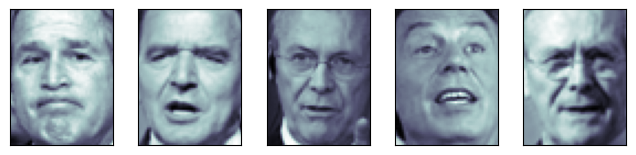

In [2]:
def plotFace(inputX, n_faces):
  fig = plt.figure(figsize=(8, 6))
  for i in range(n_faces):
      ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
      ax.imshow(np.reshape(inputX[i,:], [h,w]), cmap=plt.cm.bone)

plotFace(X, 5)

Let's divide the data into a training set and a test set with a $7:3$ ratio. Be careful to only fit your models on the training set throughout this problem.

In [3]:
# split into train-set and test-set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print( 'Number of training samples:', X_train.shape[0])
print( 'Number of testing samples:', X_test.shape[0])

Number of training samples: 798
Number of testing samples: 342


## Scikit-Learn PCA

### Fit a PCA model

Here, we use the PCA model from scikit-learn with 100 components.

shape of principal components: (100, 2914)


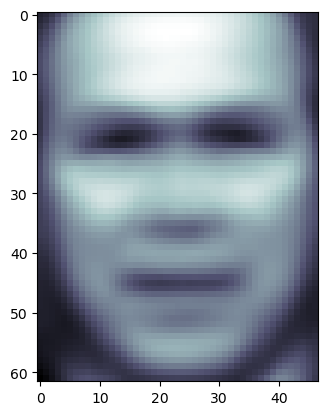

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=100, whiten=True)
pca.fit(X_train)
print("shape of principal components:", pca.components_.shape)
plt.imshow(pca.mean_.reshape([h,w]), cmap=plt.cm.bone);

Let's plot the top 10 most significant eigenfaces:

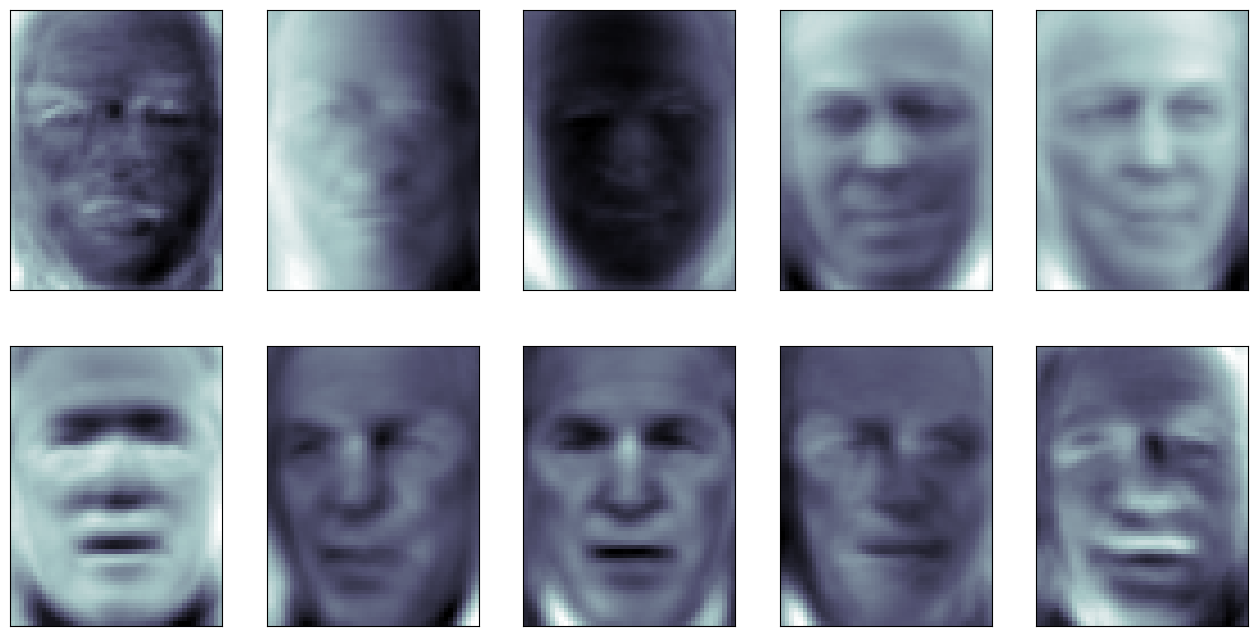

In [5]:
fig = plt.figure(figsize=(16, 8))
for i in range(10):
    ax = fig.add_subplot(2, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape([h,w]), cmap=plt.cm.bone)

And now, the top 10 least significant eigenfaces:

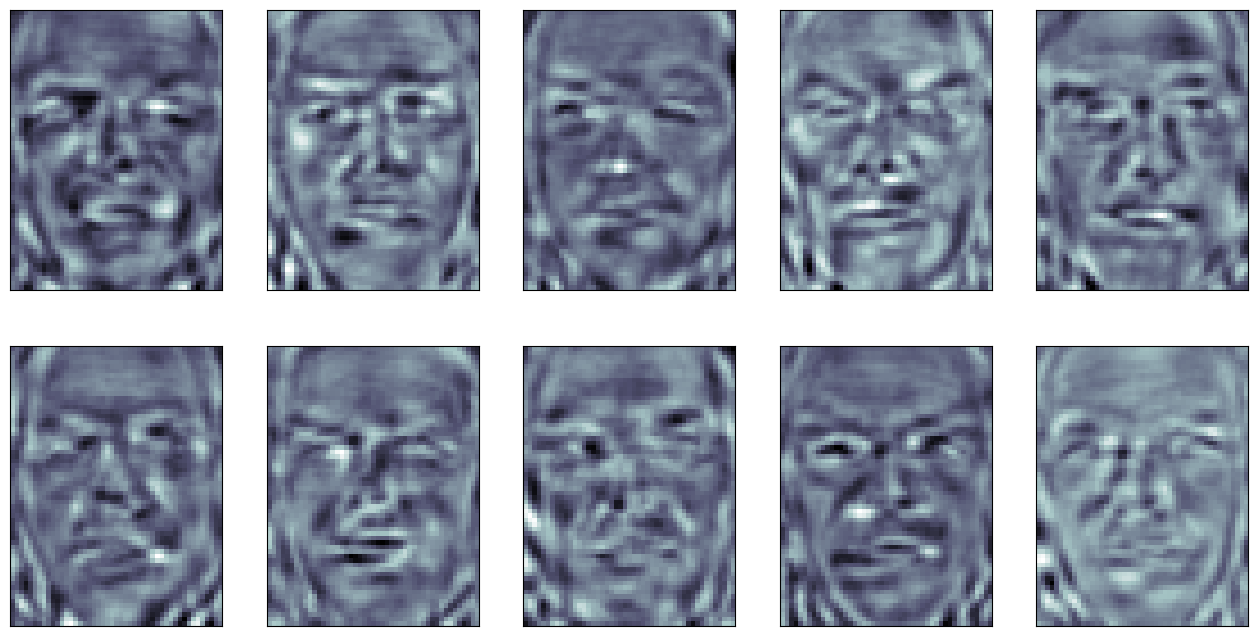

In [6]:
fig = plt.figure(figsize=(16, 8))
for i in range(10):
    ax = fig.add_subplot(2, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i + 90].reshape([h,w]), cmap=plt.cm.bone)

### PCA Transform

We can project the image vectors into the lower-dimensional PCA space. Similarly, we can reconstruct the images from the lower-dimensional vectors by applying the inverse PCA transform.

In [7]:
# Apply PCA transformation on training data
X_train_pca = pca.transform(X_train)
X_train_recon = pca.inverse_transform(X_train_pca)

print("Original shape:   ", X_train.shape)
print("Transformed shape:", X_train_pca.shape)
print("Reconstructed shape:", X_train_recon.shape)

Original shape:    (798, 2914)
Transformed shape: (798, 100)
Reconstructed shape: (798, 2914)


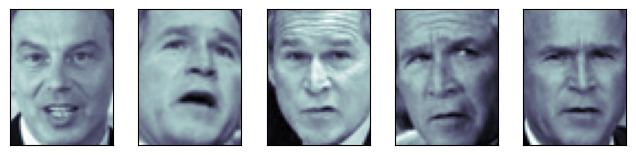

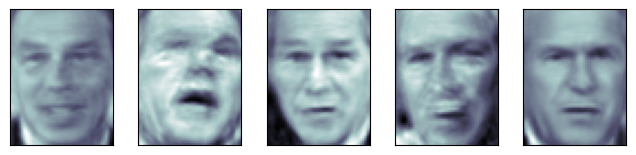

In [8]:
# Display original data and reconstructed data
plotFace(X_train, 5)
plotFace(X_train_recon, 5)

Let's calculate the reconstruction error as the Root Mean Square Error (RMSE):
\begin{equation}
    RMSE= \sqrt{\frac{1}{N} \sum_{i=1}^N (\mathbf{x}_i-\mathbf{x}'_i)^2}
\end{equation}
where $\mathbf{x}_i$ and $\mathbf{x}'_i$ denote the original and reconstructed image vectors.



In [9]:
def get_rmse(original, reconstructed):
    return np.sqrt(((original - reconstructed) ** 2).mean())

In [10]:
# for train-set
X_train_pca = pca.transform(X_train)
X_train_recon = pca.inverse_transform(X_train_pca)
rmse_train_sklearn = get_rmse(X_train, X_train_recon)
print ("RMSE reconstruction:", rmse_train_sklearn)

RMSE reconstruction: 0.043923996


In [11]:
# for test-set
X_test_pca = pca.transform(X_test)
X_test_recon = pca.inverse_transform(X_test_pca)
rmse_test_sklearn = get_rmse(X_test, X_test_recon)
print ("RMSE reconstruction:", rmse_test_sklearn)

RMSE reconstruction: 0.054177977


### Optimal n_components

Plot the RMSE for reconstruction as a function of the number of PCs for $1\leq n\_components\leq 500$.

In [12]:
train_rmse = []
test_rmse = []
for n_components in range(1, 500, 10):
  print(n_components, end=' ')
  pca = PCA(n_components=n_components, whiten=True)
  pca.fit(X_train)

  X_train_recon = pca.inverse_transform(pca.transform(X_train))
  train_rmse.append(get_rmse(X_train, X_train_recon))

  X_test_recon = pca.inverse_transform(pca.transform(X_test))
  test_rmse.append(get_rmse(X_test, X_test_recon))



1 11 21 31 41 51 61 71 81 91 101 111 121 131 141 151 161 171 181 191 201 211 221 231 241 251 261 271 281 291 301 311 321 331 341 351 361 371 381 391 401 411 421 431 441 451 461 471 481 491 

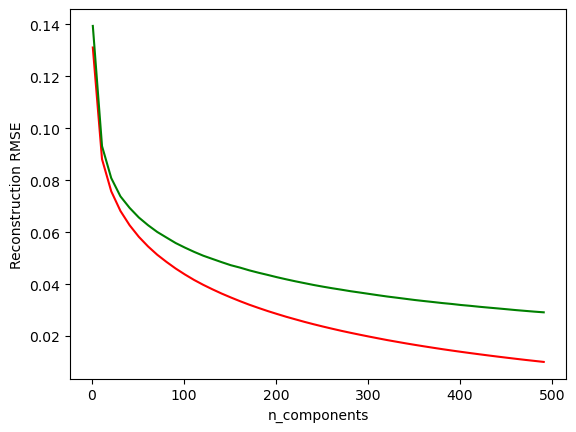

In [13]:
n_components = list(range(1, 500, 10))
plt.plot(n_components, train_rmse, 'r-', n_components, test_rmse, 'g-')
plt.xlabel('n_components')
plt.ylabel('Reconstruction RMSE')
plt.show()

## ToDo: Implement PCA

Now, implement PCA from the scratch. For this section, you are not allowed to use scikit-learn library, but feel free to leverage NumPy. Use 100 principal components (eigenfaces) to have a fair comparison with previous section.

### ToDo: Fit a PCA model

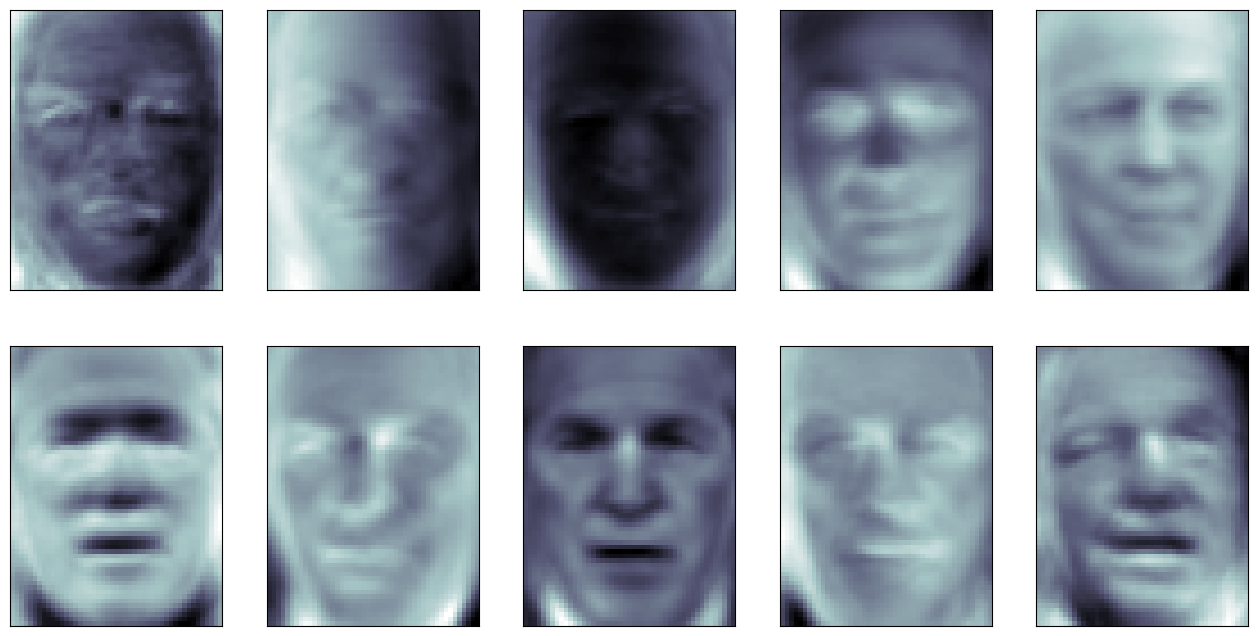

In [14]:
# ToDo: Normalize the data
# Ensure that each feature has zero mean (data is centered around zero)
# Use the training set above in the first part
mean_vector = X_train.mean(axis=0)
X_train_normalized = X_train - mean_vector


# ToDo: Calculate the covariance matrix
# Treat each column as a feature
cov_matrix = np.cov(X_train_normalized, rowvar=False)


# ToDo: Calculate the eigenvalues and eigenvectors
# Use `eigh` since the covariance matrix is symmetric
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)


# ToDo: Sort the eigenvectors
# The most significant eigenface corresponds to the largest eigenvalue
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvectors_sorted = eigenvectors[:, sorted_indices]


# ToDo: Plot the top-10 most significant eigenfaces
# Use the height and width parameters (h, w) loaded above in the first part
fig = plt.figure(figsize=(16, 8))
for i in range(10):
  ax = fig.add_subplot(2, 5, i + 1, xticks=[], yticks=[])
  ax.imshow(eigenvectors_sorted[:, i].reshape([h, w]), cmap=plt.cm.bone)


### ToDo: PCA Transform

In [15]:
# ToDo: Project the data onto the top-100 principal components
top_100_eigenvectors = eigenvectors_sorted[:, :100]
X_train_new_pca = np.dot(X_train_normalized, top_100_eigenvectors)


# ToDo: Reconstruct the data to the original space
X_train_new_recon = np.dot(X_train_new_pca, top_100_eigenvectors.T) + mean_vector


# ToDo: Calculate the reconstruction RMSE for train-set and test-set
# Use the "get_rmse(original, reconstructed)" method defined in the first part
rmse_train_from_scratch = get_rmse(X_train, X_train_new_recon)

mean_vector_test = X_test.mean(axis=0)
X_test_normalized = X_test - mean_vector_test
X_test_new_pca = np.dot(X_test_normalized, top_100_eigenvectors)
X_test_new_recon = np.dot(X_test_new_pca, top_100_eigenvectors.T) + mean_vector_test
rmse_test_from_scratch = get_rmse(X_test, X_test_new_recon)


# ToDo: Compare your results with PCA from scikit-learn
print(f"From scratch PCA:\nTrain RMSE: {rmse_train_from_scratch}, Test RMSE: {rmse_test_from_scratch}\n")
print(f"From scikit-learn PCA:\nTrain RMSE: {rmse_train_sklearn}, Test RMSE: {rmse_test_sklearn}\n")
print(f"The RMSE values of two methods are very close to each other (Small discrepancies are due to numerical precision issues).")

From scratch PCA:
Train RMSE: 0.04382489452362654, Test RMSE: 0.05401283811691852

From scikit-learn PCA:
Train RMSE: 0.0439239963889122, Test RMSE: 0.05417797714471817

The RMSE values of two methods are very close to each other (Small discrepancies are due to numerical precision issues).


# K-Nearest Neighbors (KNN) - 4 points
In this section, you will use the KNN algorithm to classify the PCA-transformed images.


## ToDo: Fit a KNN classifier
Import the KNN classifier from scikit-learn and fit it on the PCA-transformed training data.

You can use either scikit-learn PCA, or the one that you implemented.

In [16]:
# ToDo: Import the KNN classifier
# The default value for "n_neighbors" is 5
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

# ToDo: Fit the classifier
knn.fit(X_train_pca, y_train)


KNeighborsClassifier()

## ToDo: Evaluate the classifier performance
Report the classification results, (accuracy, precision, recall, f1-score), and plot the confusion matrix. Do this for both your train-set and test-set.

Train Set Metrics:

                   precision    recall  f1-score   support

     Colin Powell       0.83      0.95      0.89       167
  Donald Rumsfeld       0.83      0.67      0.74        81
    George W Bush       0.85      0.95      0.90       371
Gerhard Schroeder       0.95      0.51      0.67        72
       Tony Blair       0.87      0.74      0.80       107

         accuracy                           0.85       798
        macro avg       0.87      0.76      0.80       798
     weighted avg       0.86      0.85      0.84       798


Test Set Metrics:

                   precision    recall  f1-score   support

     Colin Powell       0.71      0.74      0.72        69
  Donald Rumsfeld       0.62      0.38      0.47        40
    George W Bush       0.74      0.89      0.81       159
Gerhard Schroeder       0.91      0.27      0.42        37
       Tony Blair       0.47      0.54      0.50        37

         accuracy                           0.70       342
        mac

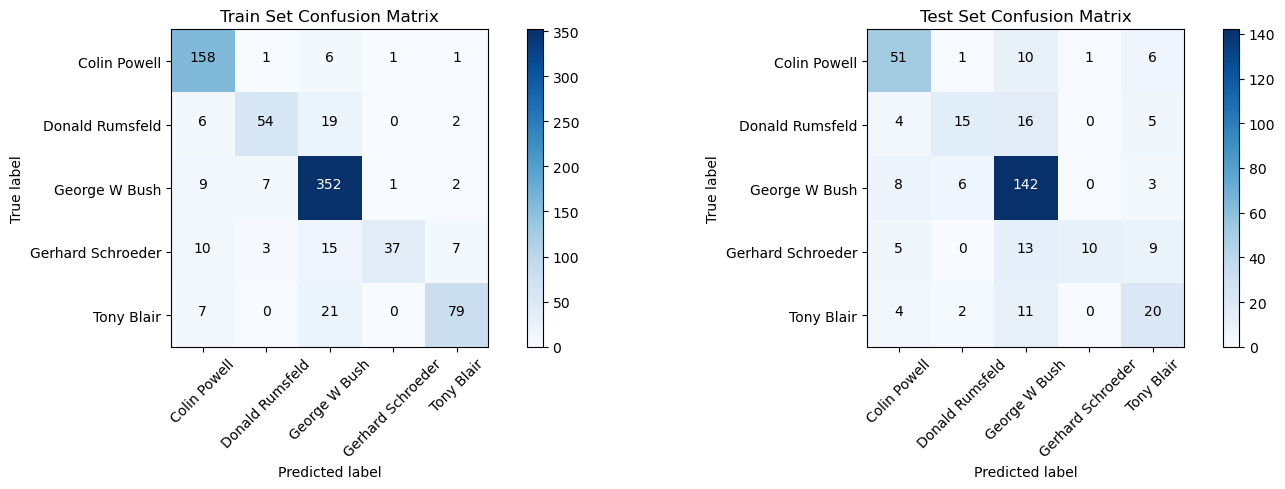

In [17]:
from sklearn.metrics import classification_report


# ToDO: Derive the predictions using classifier
y_train_pred = knn.predict(X_train_pca)
y_test_pred = knn.predict(X_test_pca)


# ToDo: Report accuracy, precision, recall, and f1-score for train-set
# Macro avg: Compute metric independently for each class and then take the average (treat all class equally)
# Weighted avg: Ensure that each class's influence on the aggregated metric is proportional to its size
print("Train Set Metrics:\n")
print(classification_report(y_train, y_train_pred, target_names = target_names))


# ToDo: Report accuracy, precision, recall, and f1-score for test-set
print("\nTest Set Metrics:\n")
print(classification_report(y_test, y_test_pred, target_names = target_names))


# ToDo: Plot the confusion matrix for train-set and test-set
def compute_multiclass_confusion_matrix(true, pred):
  classes = np.unique(true)
  matrix = np.zeros((len(classes), len(classes)), dtype = int)
  for i, c1 in enumerate(classes):
    for j, c2 in enumerate(classes):
      matrix[i, j] = np.sum((true == c1) & (pred == c2))
  return matrix

def plot_confusion_matrix(cm, title, label_names=None):
  num_classes = cm.shape[0]
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
  plt.title(title)
  plt.colorbar()

  if label_names:
      tick_labels = [label_names[i] for i in range(num_classes)]
      plt.xticks(np.arange(num_classes), tick_labels, rotation=45)
      plt.yticks(np.arange(num_classes), tick_labels)
  else:
      plt.xticks(np.arange(num_classes))
      plt.yticks(np.arange(num_classes))

  # Display the numbers in the matrix
  for i in range(num_classes):
    for j in range(num_classes):
      plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2. else "black")

  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.tight_layout()

# Create a dictionary that maps label names to label values
label_names = dict(zip(np.unique(y), target_names))

# Compute confusion matrices
cm_train = compute_multiclass_confusion_matrix(y_train, y_train_pred)
cm_test = compute_multiclass_confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
plt.sca(ax[0])        # For train set
plot_confusion_matrix(cm_train, title="Train Set Confusion Matrix", label_names=label_names)
plt.sca(ax[1])        # For test set
plot_confusion_matrix(cm_test, title="Test Set Confusion Matrix", label_names=label_names)
plt.show()
